## Does fandango inflate movie ratings?
Fandango is a popular user-driven movie review site. In this project we'll analyze fandango's movie rating system and try to investigate whether fandango does indeed shows inflated movie ratings to its users. <br>

The motivation to dive into this topic is Walt Hickey's 2015 [article](https://fivethirtyeight.com/features/fandango-movies-ratings/) revelation that there was a discrepency between the movie rating fandango displayed on its site and those that are found in the movie page's html.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.options.display.max_columns = 100

fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")
print(fandango_score_comparison.shape)
fandango_score_comparison.head()

(146, 22)


,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
movie_ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")
print(movie_ratings_16_17.shape)
movie_ratings_16_17.head()

(214, 15)


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Let's filter both datasetst to keep only those columns that are relevant to our analysis.

In [4]:
before = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
after = movie_ratings_16_17[['movie', 'year', 'fandango']]

In [5]:
before.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [6]:
after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


### Few Words About Data
The comparison data (pulled before Hicker's analysis) has 147 films from a total of 511 that are listed in another csv file from the same repo.

Every movie in this sample of 147 has to,
- be reviewwed in all the other movie rating sites, 
- have recieved atleast 30 fandango reviews,
- have its tickets up for sale in 2015 

the movies in this sample are not exactly representative of the population that is relevant to the question we're investigating. 

The sample of movies in the after dataset 2016-17 draws from a fandango's reviewed movies from these years but only includes those entries that,

- are most popular movies (that recieved most votes) at fandango.
- were released in 2016-17

besieds these limitations, data both prior to Hicket's expose and after it is subject to temporal trends - it only takes into account movies from a certain narrow time window. This could make the ratings of movies either abnormally good (if it was a good year for hollywood) or abnormally bad (if it was a poor year for the cinema). This could distort our analysis and thus lead us to inaccurate conclusions.

We'll have to think of some workaround to this problem.

## Tweaking Goals
Since we have discovered that the data we're dealing with is not representative of the population we're interested in, we'll have to either find some other data source, or modify our goal for the analysis a bit.

Getting our hands on movie ratings data prior to Hickey's analysis is almost nil, so that leaves us with changing what we want out of this analysis as the only practical thing to do.

So we'll change our goals to,

- *Has fandango changes its review system for most popular movies between 2015 and 2016?*

In addition to making the data we have useful, this will also likely serve as a good proxy to our original goal of finding out whether fandango changed its movie review system following Hickey's revelation.

Now that we have modified our goal to compare popular movie ratings from 2015 and 2016, we first need to make sure movies from both years in our sample are actually *popular*.

The first step to confirm that would be by exploring datasets' documentation. The *before* dataset we have (from before Hickey's expose) only contains those samples that have 30 or more user ratings, according to documentation. This makss the sample we're working with adequately popular and thus representative of the sample we're looking for. However, just to be extra sure, we'll see wheher there's any movie in the sample with less than 30 ratings.

In [7]:
(before.Fandango_votes < 30).sum()

0

We can relax... there's indeed no movie with less than 30 ratings in *before* database.

Documentation for the *after* dataset states it only contains popular samples but it doesn't specify what is its criterion for that - so it could be 10, 20, or 30, like the *precious* dataset. 

So to see average ratings each movies the sample data have we'll inspect 10 randomly sampled movies from the data and print out average number of ratings for all the movies in the data.

In [8]:
after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Now let's see how many ratings these movies received from fandango's site. As of 2018, this is how many ratings each movie recieved. 

|Movie	|Fan ratings|
|-------|-----------||
|Mechanic: Resurrection	|2247|
|Warcraft	|7271|
|Max Steel	|493|
|Me Before You	|5263|
|Fantastic Beasts and Where to Find Them	|13400|
|Cell	|17|
|Genius	|127|
|Sully	|11877|
|A Hologram for the King	|500|
|Captain America: Civil War	|35057|

Out of these randomly selected sample of 10, only 1 movie received less than 30 ratings. 30 is the number we have choosen as the threshlod because
- it's a reasonable number, neither too high to exclude too many movies, nor to low to encompass too many
- it's matches with the popularity criterion used in our other dataset, *after*

This means we can go ahead and start analysing *before* and *after* to try answering the question we just defined.

### Keeping only 2015 & 2016 movies

There's still one thing we haven't addressed though. Movies in our *before* sample are a mix of both 2014 and 2015 releases. Similarly, in the *after* sample, there are movies that were released in 2016 and those that got released in 2017. 

We're, however, only interested in comparing movies from 2 years - 2015 and 2016. The rest of the sample entries are not useful to our analysis. So it is a nice idea to exclude them from our analysis moving forward.

Let's print the first few rows of our orginal datasets to see which column contains information on movie's release date.

In [9]:
movie_ratings_16_17.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


In [10]:
fandango_score_comparison.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


Luckily, there's a column named *year* in the 2016-17 movie dataset. It contains relase year for corresponding movie.

In the 2014-15 dataset, however, there's no sepereate field for movie's release year but it does appear with movie's name in the first column in paranthesis. We'll have to find a way to extract this info and use to filter the data.

In [11]:
mask_2016 = movie_ratings_16_17["year"] == 2016
movies_2016 = movie_ratings_16_17[mask_2016]
movies_2016.reset_index(drop=True, inplace=True)

In [12]:
movies_2016 = movies_2016[["movie", "year", "fandango"]]


In [13]:
import re

pattern = r"[0-9]{4}"
string = "jahjkdfsj6743kj"
result = re.findall(pattern, string)
print(result[0])

# fandango_score_comparison.head(3)

6743


In [14]:
before["Year"] = before.copy()["FILM"].apply(lambda x: re.findall(pattern, x)[0])

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [15]:
before["Year"] = before["Year"].apply(np.int64)
movies_2015 = before[before["Year"] == 2015]
movies_2015.reset_index(drop=True, inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Now that we have cleaned and sorted 2015 and 2016 popular movie data into *movies_2015* and *movies_2016*, we can move to analysisng it. As a reminder and to help us remain focused, it'd be nice to reiterate our goal:

*Is there a difference between fandango's ratings for popular movies in 2015 and 2016?*

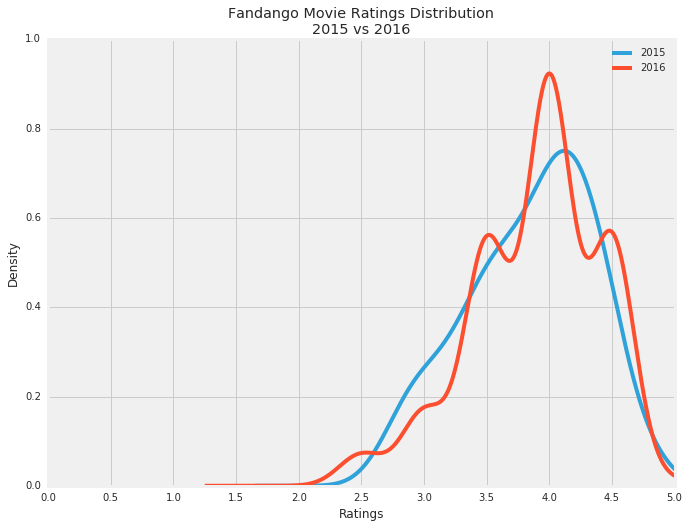

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

movies_2015["Fandango_Ratingvalue"].plot.kde(label="2015", legend=True, figsize=(10,8))
movies_2016["fandango"].plot.kde(label="2016", legend=True, figsize=(10,8))

plt.title("Fandango Movie Ratings Distribution\n2015 vs 2016")
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.1, 0.5))
plt.xlabel("Ratings")
plt.show()


We can make following observations from the graph,

1. Both graphs are left skewed.

2. They peak at different but close values.

The 2015 graph peaks at around 4.2 while the one for 2016 at 4.0.
That means a movie from 2016 is most likely to recieve a 4.0 rating while a movie from 2015 is most likely to recieve a 4.2 rating. 

3. The peak for 2016 graph is higher than that for 2015 graph.
That means that most common rating for 2016 (4.0) is more likely to be held by a randomly seletcted movie from 2016 than the most common rating (4.2) for any movie from 2015.


Let's dig deeper into the rating pattern and see realative percetages of ratings in each dataset seperately.

Since the number of movies in both datasets is different, we will normalize our frequencies by expresssing them in percentages.

In [17]:
movies_2016


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Hologram for the King,2016,3.0
4,A Monster Calls,2016,4.0
5,A Street Cat Named Bob,2016,4.5
6,Alice Through the Looking Glass,2016,4.0
7,Allied,2016,4.0
8,Amateur Night,2016,3.5
9,Anthropoid,2016,4.0


In [18]:
print("Rating & its frequency for 2015 movies", '\n', "-"*40)
movies_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

Rating & its frequency for 2015 movies 
 ----------------------------------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [19]:
print("Rating & its frequency for 2016 movies", '\n', "-"*40)
movies_2016["fandango"].value_counts(normalize=True).sort_index()*100

Rating & its frequency for 2016 movies 
 ----------------------------------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

As we can see, almost 45% of the movies in 2015 got 4.5 or 5 ratings, while in 2016 the combined percentage of movies that recieved these ratings is about 25%.

Another observation we can make is there're very few movies with 5 ratings from our 2016 sample. This is contrary to 2015 when we had about 7% movies with 5 star ratings.

One other observation we can make is. there's no movie in 2015 sample that got 2.5 starts whereas as in 2016 sample, about 3 percent of the movies received 2.5 star ratings.

It is becoming more evident that fandango did indeed change its ratings system between 2015 and 2016. In 2015 they assigned ratings rather generously so many movies got 4.5 and 5 ratings. 

In 2016, their ratings toned down to the mid level, with most movies revieving ratings of 4.

Now, it would be nice to get an high level view of some key data statistics. We'll be using mean, median, mode for that.

In [20]:
mean_2015 = movies_2015["Fandango_Stars"].mean()
median_2015 = movies_2015["Fandango_Stars"].median()
mode_2015 = movies_2015["Fandango_Stars"].mode().iloc[0]

mean_2016 = movies_2016["fandango"].mean()
median_2016 = movies_2016["fandango"].median()
mode_2016 = movies_2016["fandango"].mode().iloc[0]

statistics = {"2015": [mean_2015, median_2015, mode_2015], "2016": [mean_2016, median_2016, mode_2016]}
statistics = pd.DataFrame(statistics, index=["mean", "median", "mode"])

statistics.head()

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Let's also plot these for better visualization.

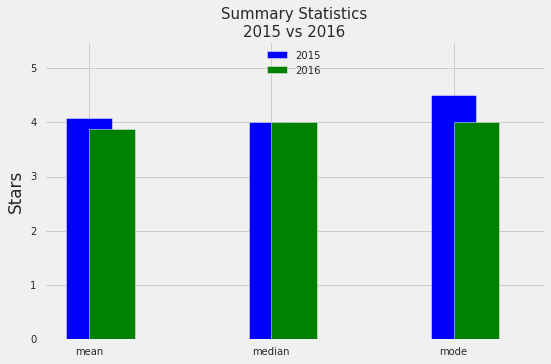

In [41]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.style.use("fivethirtyeight")
statistics["2015"].plot.bar(color="blue", label="2015", align="center", width=0.25)
statistics["2016"].plot.bar(color="green", label="2016", align="edge", width=0.25, rot=0)

plt.ylim(0.5, 5.5)
plt.yticks(np.arange(0, 6, 1))
plt.ylabel("Stars")
plt.legend(loc="upper center")
plt.title("Summary Statistics\n2015 vs 2016", size=15)



Some observations are,

1. Average rating value for 2015 movies is higher than 2016.
2. Center rating for both years, if all of the ratings are arranged in order, is the same (4.0).
3. Most common 2015 rating is 4.5 & 2016 is 4.0

### Conclusion

Our analysis shows that fandango did indeed change the ratings system for their movies between bwtween 2015 & 2016. In 2015, popular moives on average received higher ratings - for 2016 however, this figeure fell slightly.

We can't conclusively say what caused this change however chances are that Hickey's expose led to fandange changing their biased raings system.